In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv")

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Count'>

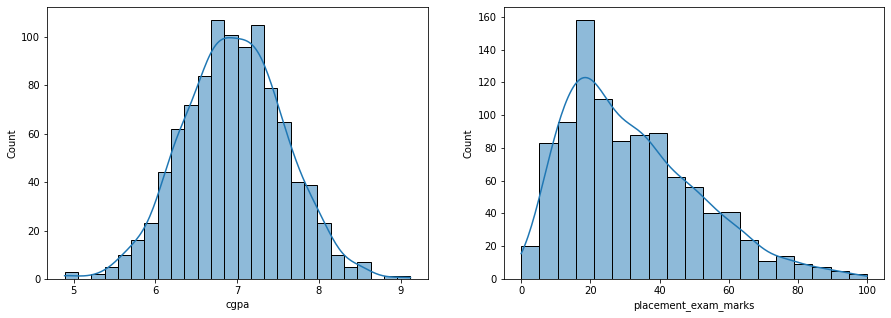

In [4]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(15,5))
sns.histplot(df["cgpa"],ax=ax1,kde=True)
sns.histplot(df["placement_exam_marks"],ax=ax2,kde=True)

In [5]:
# plt.figure(figsize=(15,5))
# ax1=plt.subplots(121)
# sns.histplot(df["cgpa"],ax=ax1,kde=True)
# ax2=plt.subplots(122)
# sns.histplot(df["placement_exam_marks"],ax=ax2,kde=True)

C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


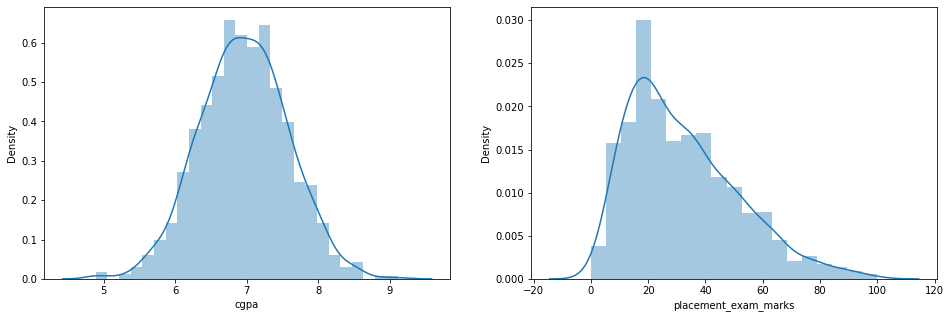

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [7]:
mean=df["cgpa"].mean()

In [8]:
std=df["cgpa"].std()

In [9]:
upper_limit=mean+3*std

In [10]:
lower_limit=mean-3*std

In [11]:
upper_limit,lower_limit

(8.808933625397177, 5.113546374602842)

In [12]:
df[(df["cgpa"]>8.808933625397177) | (df["cgpa"]<5.113546374602842)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [13]:
#approch 1
new_df=df[(df["cgpa"]<8.808933625397177) & (df["cgpa"]>5.113546374602842)]

In [14]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [15]:
#approch 2
df["cgpa_zscore"]=df["cgpa"]-df["cgpa"].mean()/df["cgpa"].std()

In [16]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,-4.112588
1,7.46,38.0,1,-3.842588
2,7.54,40.0,1,-3.762588
3,6.42,8.0,1,-4.882588
4,7.23,17.0,0,-4.072588


In [17]:
df[(df["cgpa_zscore"]>3) | (df["cgpa_zscore"]< -3)]
# df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]


,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,-4.112588
1,7.46,38.0,1,-3.842588
2,7.54,40.0,1,-3.762588
3,6.42,8.0,1,-4.882588
4,7.23,17.0,0,-4.072588
...,...,...,...,...
992,6.26,12.0,0,-5.042588
993,6.73,21.0,1,-4.572588
994,6.48,63.0,0,-4.822588
997,4.89,34.0,0,-6.412588


In [18]:
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]


In [19]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
37,8.51,9.0,1,-2.792588
54,8.42,36.0,1,-2.882588
76,8.35,12.0,0,-2.952588
150,8.53,22.0,0,-2.772588
279,8.49,40.0,1,-2.812588
290,8.38,87.0,0,-2.922588
440,8.56,22.0,0,-2.742588
492,8.50,21.0,1,-2.802588
596,8.48,25.0,1,-2.822588
850,8.39,37.0,1,-2.912588


# capping

In [20]:
upper_limit

8.808933625397177

In [21]:
lower_limit

5.113546374602842

In [22]:
df["cgpa"]=np.where(
    df["cgpa"]>upper_limit,upper_limit,
    np.where(df["cgpa"]<lower_limit,
            lower_limit,
            df["cgpa"])

)

In [23]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,-4.112588
1,7.46,38.0,1,-3.842588
2,7.54,40.0,1,-3.762588
3,6.42,8.0,1,-4.882588
4,7.23,17.0,0,-4.072588


In [24]:
df.cgpa.describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64